In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import time
import matplotlib.pyplot as pl
import numpy as np
import itertools as it
from astropy.io import fits
import healpy as hp
from scipy import linalg

from powspecpy import PowSpecEstimator as PSE
from powspecpy import this_project as P

In [65]:
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
LMAX = NSIDE
BEAMSIZE = 35./60.
BINFACTOR = 8

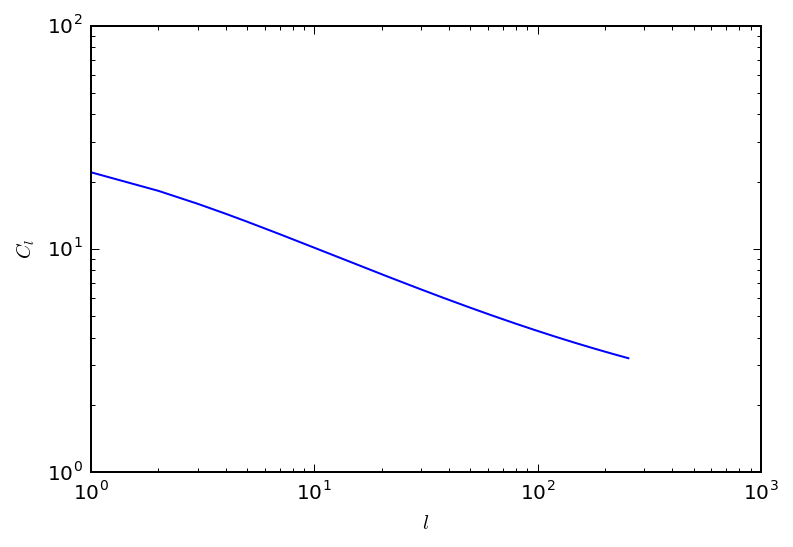

In [6]:
power = (lambda k: (np.random.random()+5.)*5. / (k + 1.) ** np.random.random()+1.5)
cl_in = power(np.arange(LMAX))
ls = np.arange(cl_in.size)
pl.loglog(cl_in)
pl.xlabel(r'$l$')
pl.ylabel(r'$C_l$')

Sigma is 14.863132 arcmin (0.004324 rad) 
-> fwhm is 35.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


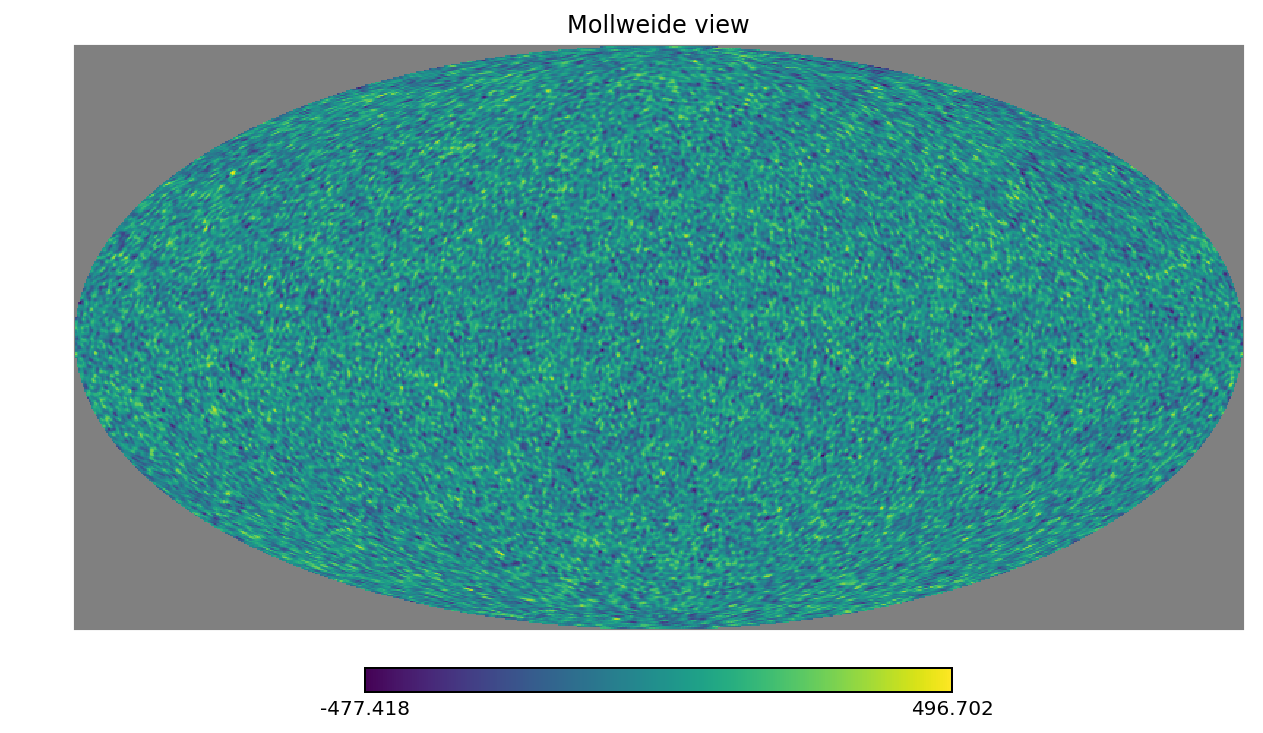

In [7]:
# generate field
random_field = hp.synfast(cl_in, NSIDE, verbose=False)

# simulate beam
random_field = hp.smoothing(random_field, fwhm=np.deg2rad(BEAMSIZE), iter=1)

# view field
hp.mollview(random_field, cmap=P.CMAP)

In [49]:
theta, phi = hp.pix2ang(NSIDE, np.arange(NPIX))
glon = np.rad2deg(phi)
glat = 90. - np.rad2deg(theta)
mask = glat > 0.
mask = hp.smoothing(mask, fwhm=1.*np.deg2rad(BEAMSIZE), iter=1)

Sigma is 14.863132 arcmin (0.004324 rad) 
-> fwhm is 35.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


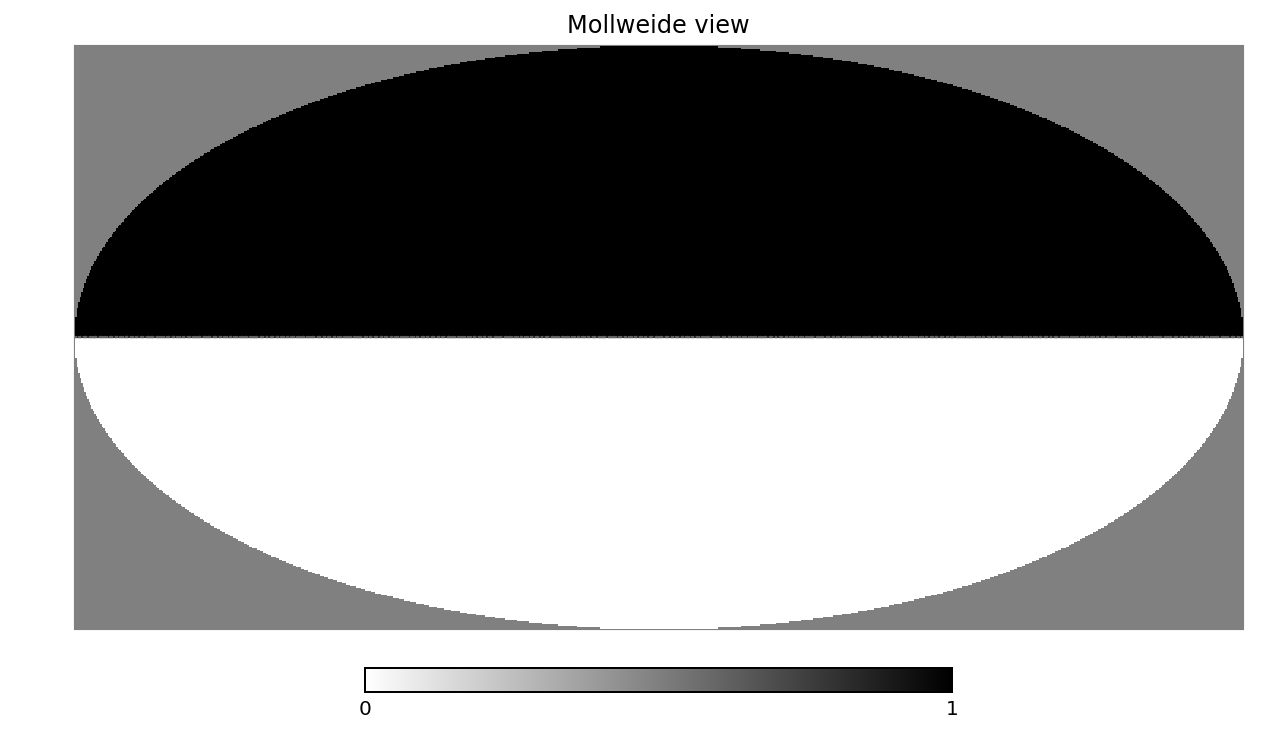

In [50]:
hp.mollview(mask, min=0., max=1., cmap=P.CMAP_GREY)

In [66]:
pse = PSE(random_field, mask=mask, lmax=LMAX, beam=BEAMSIZE)
pse.set_binfactor(binfactor=BINFACTOR)

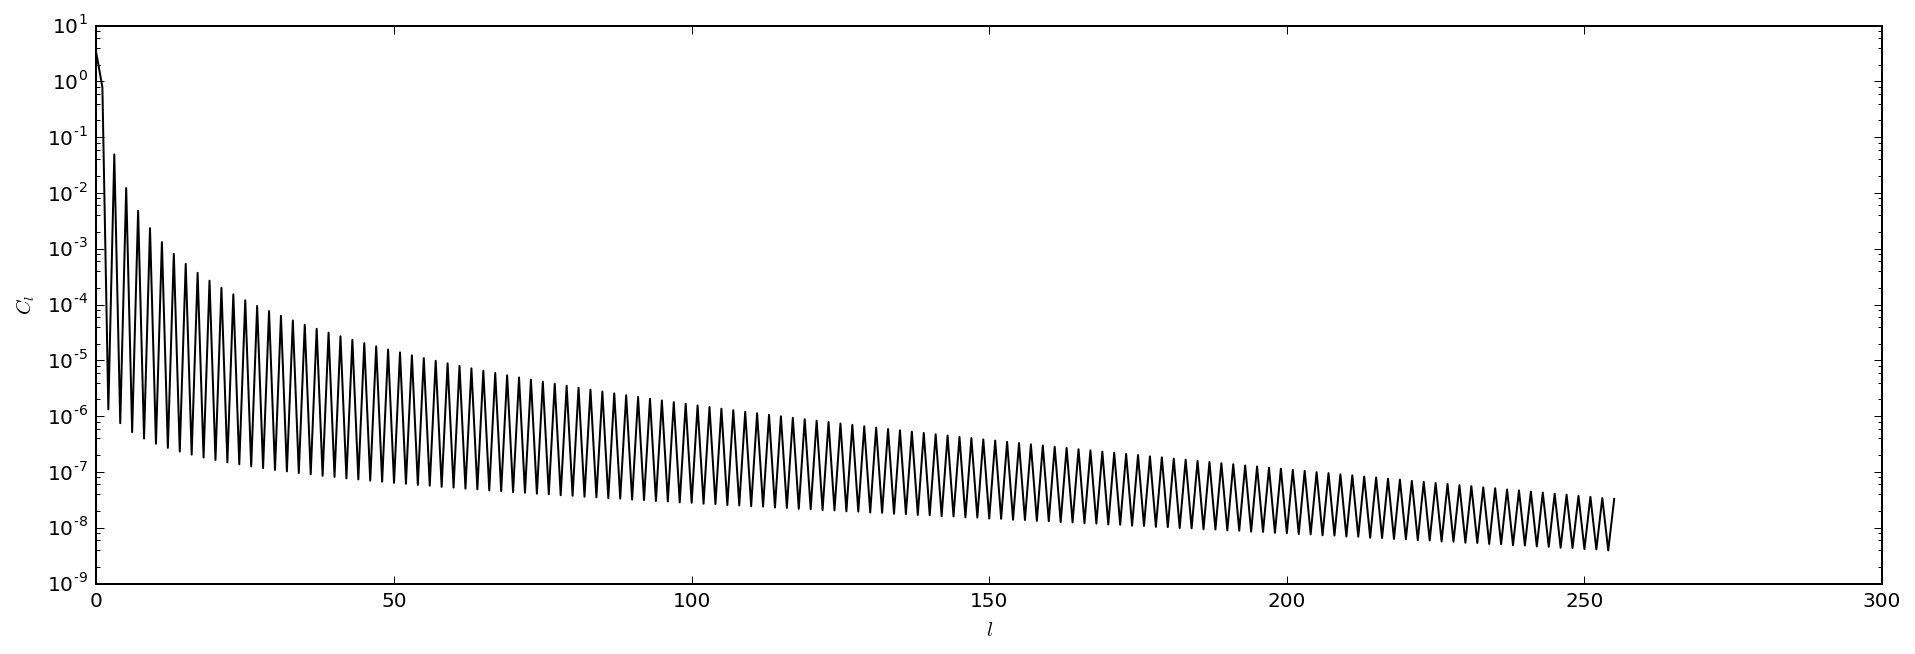

In [67]:
pl.figure(figsize=(16, 5))
pl.plot(pse.cl_mask, c='k')
pl.yscale('log')
pl.xlabel(r'$l$')
pl.ylabel(r'$C_l$')

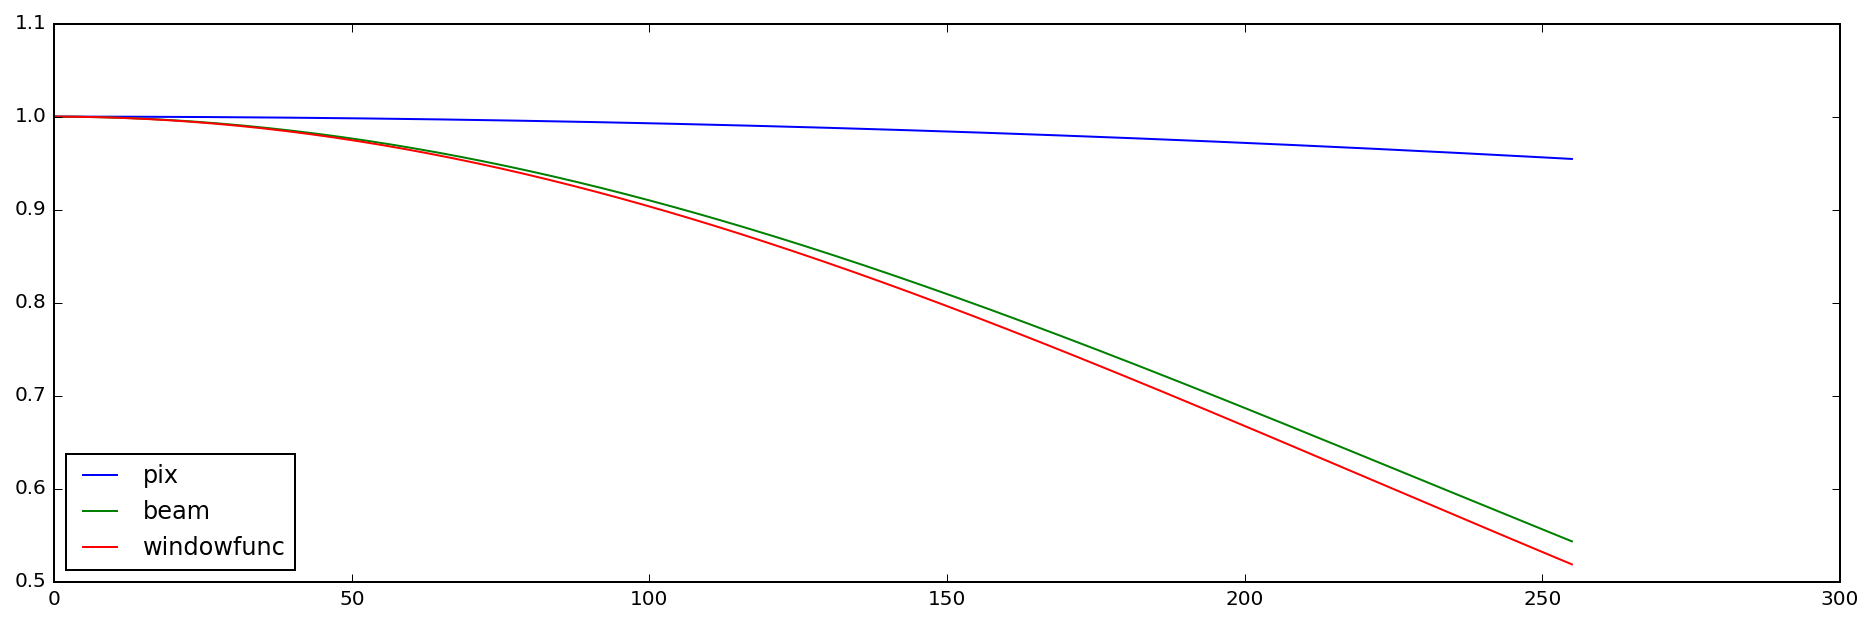

In [68]:
pl.figure(figsize=(16, 5))
pl.plot(pse.pixfunc, label='pix')
pl.plot(pse.beamfunc, label='beam')
pl.plot(pse.windowfunc, label='windowfunc')
pl.legend(loc='lower left')

(0.1, 50.0)

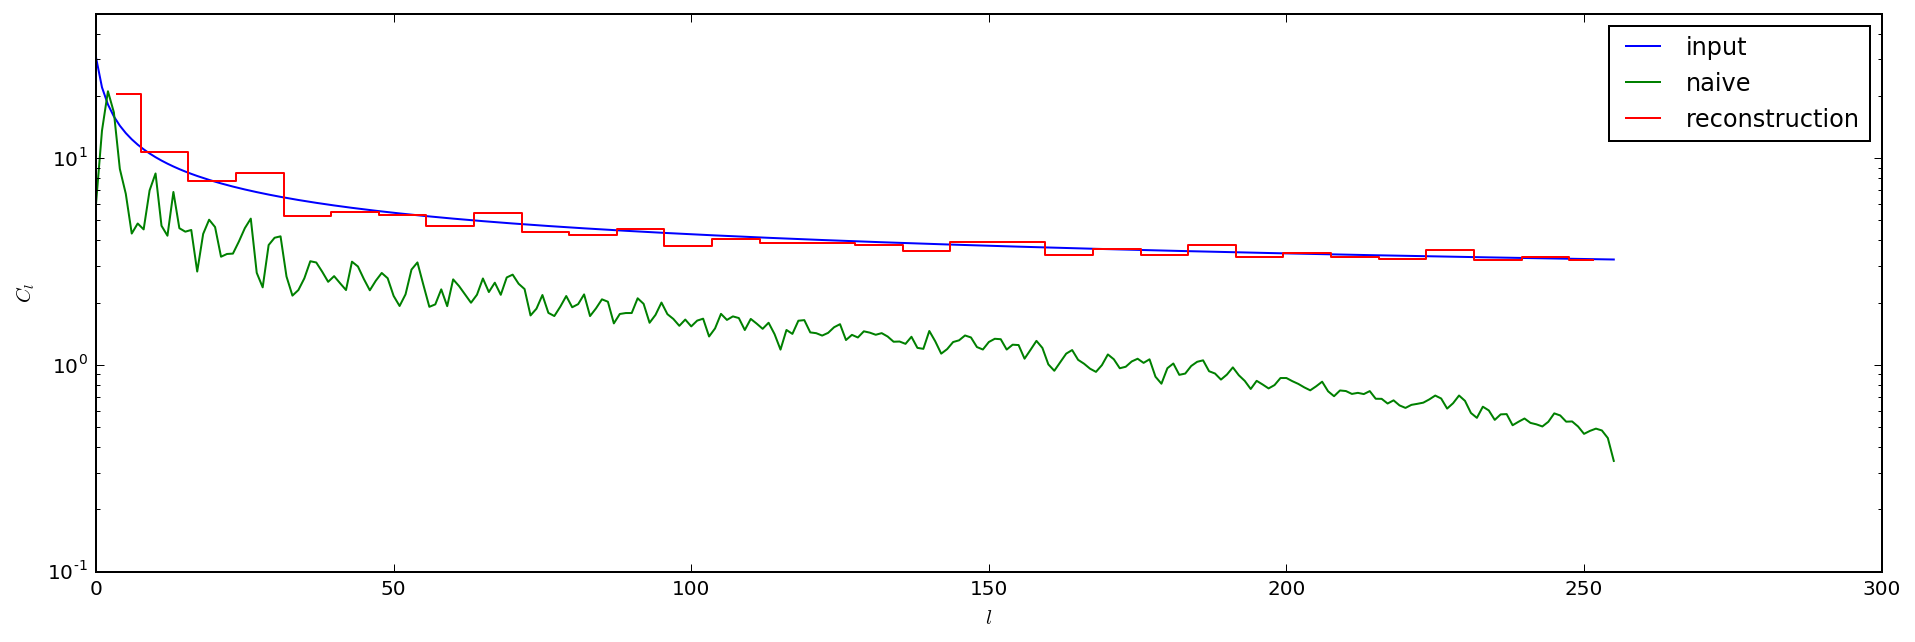

In [69]:
pl.figure(figsize=(16, 5))
pl.plot(ls, cl_in, label='input')
pl.plot(ls, pse.cl_conv, label='naive')
pl.plot(pse.bin_centres, pse.cl_deconv_b, label='reconstruction', drawstyle='steps-mid')

pl.legend(loc='best')
pl.yscale('log')
pl.xlabel(r'$l$')
pl.ylabel(r'$C_l$')
pl.ylim([1.e-1, 5.e1])

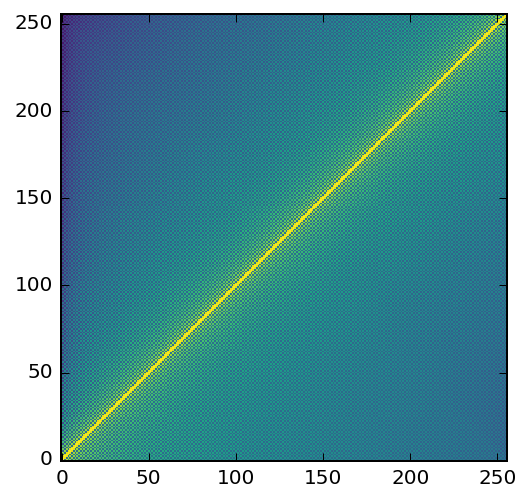

In [70]:
pl.imshow(np.log10(np.abs(pse.M_l1l2)), interpolation='nearest', origin='lower', cmap=P.CMAP)

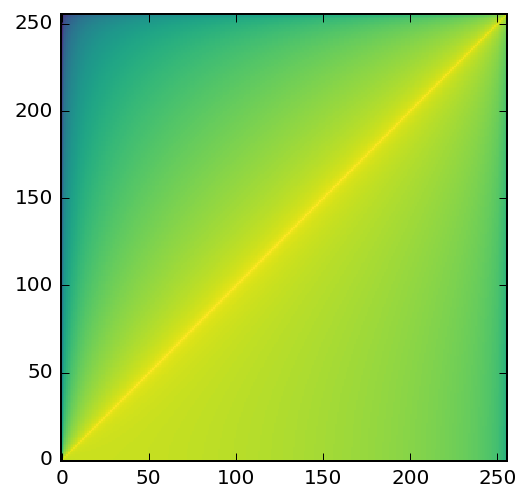

In [76]:
pl.imshow(np.log10(np.abs(np.linalg.inv(pse.M_l1l2))), interpolation='nearest', origin='lower', cmap=P.CMAP)